In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,normalize,label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc, f1_score, precision_score,recall_score
from time import time


In [3]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 1. Pairwise relations in dataset using seaborn

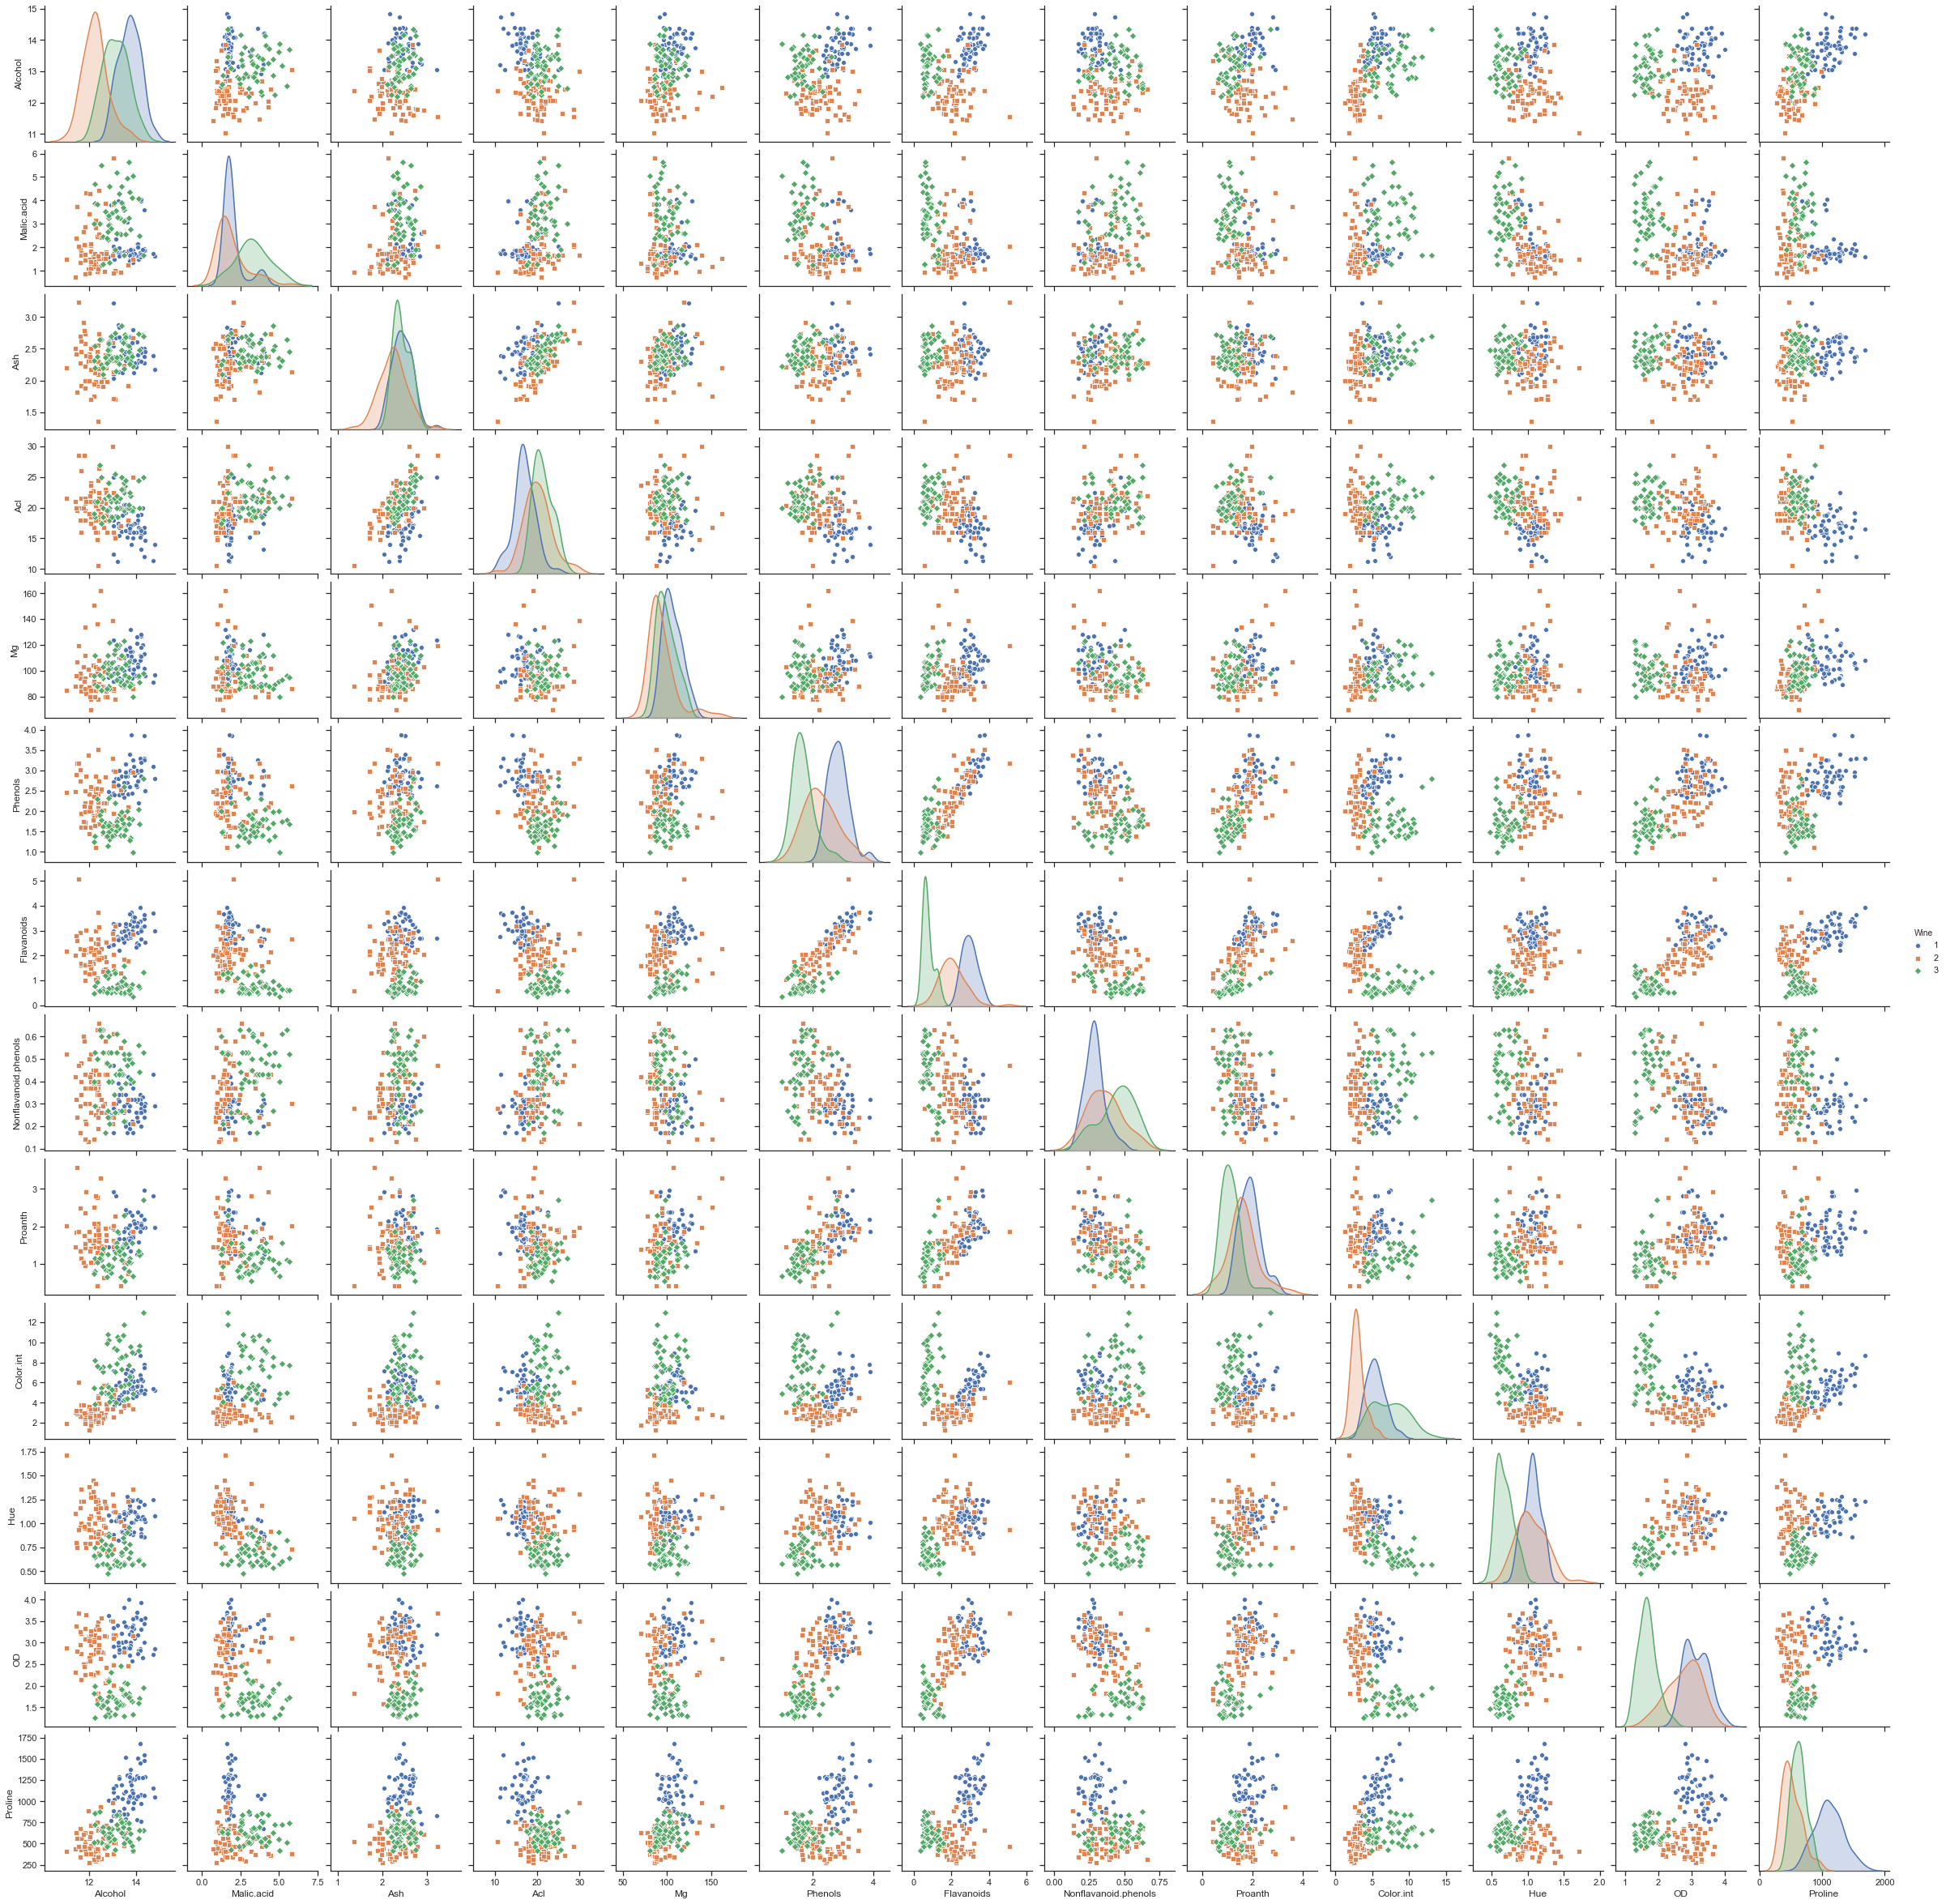

In [103]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue="Wine", markers=["o", "s", "D"])

In [4]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)
warnings.filterwarnings('ignore')


In [15]:
def evaluateClassifier(x,y,y_pred,y_score):
    cm = pd.DataFrame(
        confusion_matrix(y, y_pred),
        columns=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3'],
        index=['True Wine 1', 'True Wine 2','True Wine 3']
    )
    print('\nConfusion Matrix: \n')
    print(cm)
    w1 = cm['Predicted Wine 1']['True Wine 1'] / (cm['Predicted Wine 1']['True Wine 1'] + cm['Predicted Wine 2']['True Wine 1'] + cm['Predicted Wine 3']['True Wine 1'])
    w2 = cm['Predicted Wine 2']['True Wine 2'] / (cm['Predicted Wine 1']['True Wine 2'] + cm['Predicted Wine 2']['True Wine 2'] + cm['Predicted Wine 3']['True Wine 2'])
    w3 = cm['Predicted Wine 3']['True Wine 3'] / (cm['Predicted Wine 1']['True Wine 3'] + cm['Predicted Wine 2']['True Wine 3'] + cm['Predicted Wine 3']['True Wine 3'])
    print('\nClasswise accuracy: ')
    print('\nWine 1: ',w1 * 100)
    print('\nWine 2: ',w2 * 100)
    print('\nWine 3: ',w3 * 100)
    print('\nAccuracy of the model:',accuracy_score(y,y_pred) * 100)
    print('\nPrecision of the model:',precision_score(y,y_pred,average = 'macro') * 100)
    print('\nRecall of the model:',recall_score(y,y_pred,average = 'macro') * 100)
    print('\nF1 Score of the model:',2 * recall_score(y,y_pred,average = 'macro') * precision_score(y,y_pred,average = 'macro') / (recall_score(y,y_pred,average = 'macro') + precision_score(y,y_pred,average = 'macro')) * 100)
    y = label_binarize(y, classes = range(1,4))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.2, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC curve')
    plt.show()

## 2. Gaussian Naive Bayes Classifier

## On training data

Training time:  0.0039975643157958984

Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                38                 2                 0
True Wine 2                 0                49                 1
True Wine 3                 0                 0                34

Classwise accuracy: 

Wine 1:  95.0

Wine 2:  98.0

Wine 3:  100.0

Accuracy of the model: 97.58064516129032

Precision of the model: 97.7404295051354

Recall of the model: 97.66666666666666

F1 Score of the model: 97.70353416379572


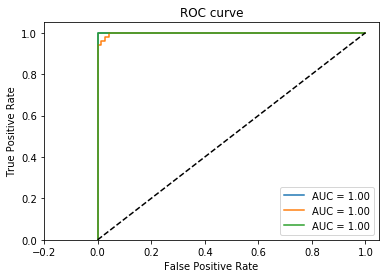

In [16]:
gnb = GaussianNB()
start = time()
gnb.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,gnb.predict(x_train),gnb.predict_proba(x_train))
# gnb.predict_proba(x_train)


## On testing data


Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                19                 0                 0
True Wine 2                 0                21                 0
True Wine 3                 0                 0                14

Classwise accuracy: 

Wine 1:  100.0

Wine 2:  100.0

Wine 3:  100.0

Accuracy of the model: 100.0

Precision of the model: 100.0

Recall of the model: 100.0

F1 Score of the model: 100.0


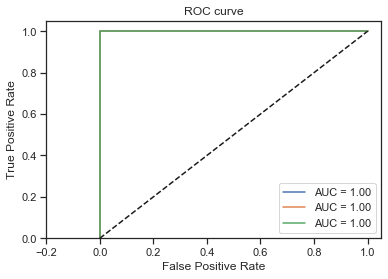

In [107]:
evaluateClassifier(x_test,y_test,gnb.predict(x_test),gnb.predict_proba(x_test))

# 3. Decision Tree Classifier

## On training data

Training time:  0.0

Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                40                 0                 0
True Wine 2                 0                50                 0
True Wine 3                 0                 0                34

Classwise accuracy: 

Wine 1:  100.0

Wine 2:  100.0

Wine 3:  100.0

Accuracy of the model: 100.0

Precision of the model: 100.0

Recall of the model: 100.0

F1 Score of the model: 100.0


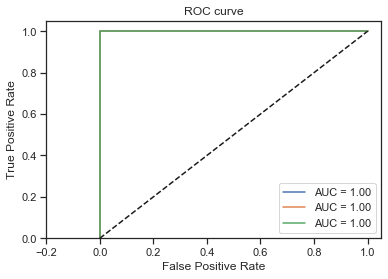

In [108]:
def dtree_grid_search(X,y,nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    dtree_model=DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = nfolds)
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

optimal_params = dtree_grid_search(x_train,y_train,5)

dtc = DecisionTreeClassifier(criterion = optimal_params['criterion'],max_depth = optimal_params['max_depth'])
start = time()
dtc.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,dtc.predict(x_train),dtc.predict_proba(x_train))

## On testing data


Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                17                 2                 0
True Wine 2                 0                21                 0
True Wine 3                 0                 1                13

Classwise accuracy: 

Wine 1:  89.47368421052632

Wine 2:  100.0

Wine 3:  92.85714285714286

Accuracy of the model: 94.44444444444444

Precision of the model: 95.83333333333334

Recall of the model: 94.11027568922306

F1 Score of the model: 94.96398922425642


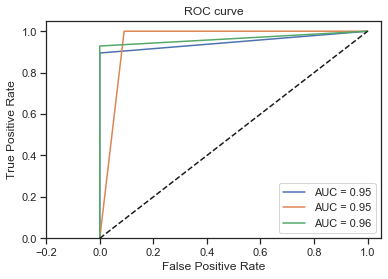

In [109]:
optimal_params = dtree_grid_search(x_test,y_test,5)

dtc = DecisionTreeClassifier(criterion = optimal_params['criterion'],max_depth = optimal_params['max_depth'])
dtc.fit(x_train, y_train)
evaluateClassifier(x_test,y_test,dtc.predict(x_test),dtc.predict_proba(x_test))

# 4. KNN Classifier

## On training data

Training time:  0.0

Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                40                 0                 0
True Wine 2                 3                46                 1
True Wine 3                 0                 0                34

Classwise accuracy: 

Wine 1:  100.0

Wine 2:  92.0

Wine 3:  100.0

Accuracy of the model: 96.7741935483871

Precision of the model: 96.72203765227022

Recall of the model: 97.33333333333333

F1 Score of the model: 97.02672266861457


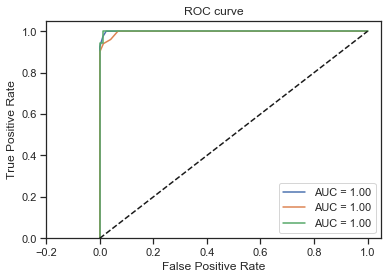

In [110]:
def knn_grid_search(X,y,nfolds):
    param_grid = { 'n_neighbors':range(25)}
    knn_model = KNeighborsClassifier()
    knn_gscv = GridSearchCV(knn_model, param_grid, cv = nfolds)
    knn_gscv.fit(X, y)
    return knn_gscv.best_params_

optimal_params = knn_grid_search(x_train,y_train,5)

knn = KNeighborsClassifier(n_neighbors = optimal_params['n_neighbors'])
start = time()
knn.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,knn.predict(x_train),knn.predict_proba(x_train))

## On testing data


Confusion Matrix: 

             Predicted Wine 1  Predicted Wine 2  Predicted Wine 3
True Wine 1                19                 0                 0
True Wine 2                 1                19                 1
True Wine 3                 0                 0                14

Classwise accuracy: 

Wine 1:  100.0

Wine 2:  90.47619047619048

Wine 3:  100.0

Accuracy of the model: 96.29629629629629

Precision of the model: 96.11111111111111

Recall of the model: 96.82539682539682

F1 Score of the model: 96.46693176104941


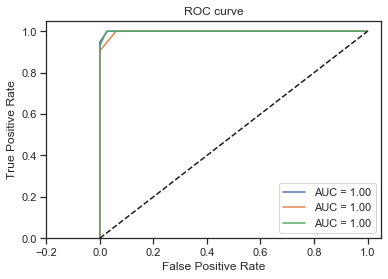

In [111]:
optimal_params = knn_grid_search(x_test,y_test,5)

knn = KNeighborsClassifier(n_neighbors = optimal_params['n_neighbors'])
knn.fit(x_train, y_train)
evaluateClassifier(x_test,y_test,knn.predict(x_test),knn.predict_proba(x_test))

# Inferences:
## 1.On testing data, Naive Bayes give the best accuracy.
## 2.The F1 score is also maximum in case of Naive Bayes.
## 3.In terms of training time, KNN Classifier gives the best results.

# Conclusion
## Gaussian Naive Bayes is the best classification model for the given data set.